# Análisis Exploratorio de Datos: Métricas de Interacción en Destinos Turísticos de Medellín

Este repositorio contiene un análisis exploratorio de datos centrado en evaluar las métricas de interacción de los destinos turísticos más visitados en Medellín. A través de este estudio, se destacan patrones de preferencia turística, identificando los lugares de mayor atracción para los visitantes.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
# Cargar el archivo CSV
archivo_csv = "/content/metricas_interaccion_medellin_travel(Recuperado automáticamente)-Datos.csv"
df = pd.read_csv(archivo_csv, delimiter=';', encoding='utf-8')

# Mostrar los títulos (nombres de las columnas)
print(df.columns)


Index(['med_ciudad', 'med_ciudadid', 'med_codigopais', 'med_dispositivoacceso',
       'med_duracionsesion', 'med_fecha', 'med_hits', 'med_latitud',
       'med_longitud', 'med_pais', 'med_promedioduracionsesion',
       'med_rutapaginadestino', 'med_tipousuario', 'med_usuarios',
       'med_visitas'],
      dtype='object')


In [ ]:
títulos = df.columns.tolist()
print(títulos)

['med_ciudad', 'med_ciudadid', 'med_codigopais', 'med_dispositivoacceso', 'med_duracionsesion', 'med_fecha', 'med_hits', 'med_latitud', 'med_longitud', 'med_pais', 'med_promedioduracionsesion', 'med_rutapaginadestino', 'med_tipousuario', 'med_usuarios', 'med_visitas']


In [ ]:
# Eliminar filas con valores nulos en columnas específicas
df_limpio = df.dropna(subset=['med_ciudad', 'med_rutapaginadestino'])


In [ ]:
# Contar el número de visitas por ciudad
visitas_por_ciudad = df_limpio['med_ciudad'].value_counts().reset_index()
visitas_por_ciudad.columns = ['Ciudad', 'Visitas']

In [ ]:
# Seleccionar las 10 ciudades con más visitas
top_ciudades = visitas_por_ciudad.head(20)

<ipython-input-61-c205fe975685>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ciudades, x='Ciudad', y='Visitas', palette='viridis', saturation=0.8)


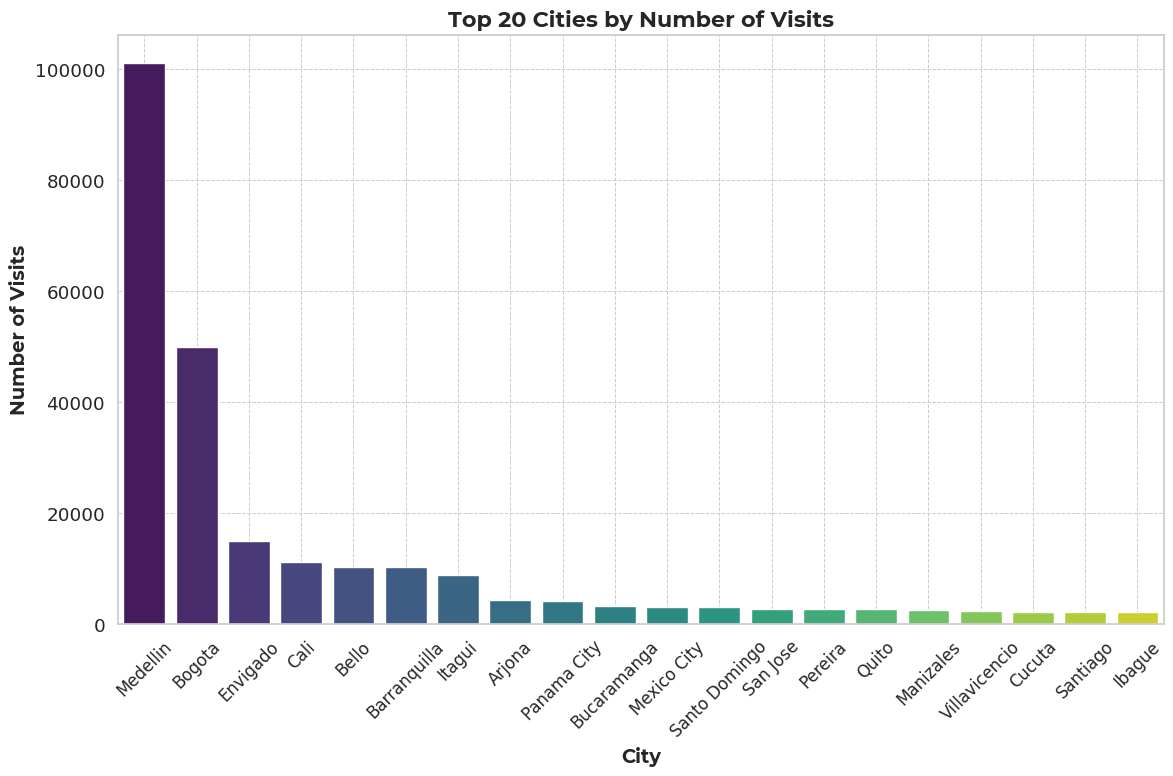

In [ ]:
# Create the chart
plt.figure(figsize=(12, 8))
sns.barplot(data=top_ciudades, x='Ciudad', y='Visitas', palette='viridis', saturation=0.8)


# Cargar la fuente Montserrat
font_path = 'Montserrat-Bold.ttf'
fm.fontManager.addfont(font_path)

# Configurar la fuente
montserrat_bold = fm.FontProperties(fname=font_path)

# Establecer la fuente de alto contraste
plt.title('Top 20 Cities by Number of Visits', fontproperties=montserrat_bold, fontsize=16)
plt.xlabel('City', fontproperties=montserrat_bold, fontsize=14)
plt.ylabel('Number of Visits', fontproperties=montserrat_bold, fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.grid(visible=True, linestyle='--', linewidth=0.7)
plt.show()


<ipython-input-63-bde328dba18f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rutas, x='Visitas', y='Ruta', palette='deep', order=top_rutas['Ruta'])


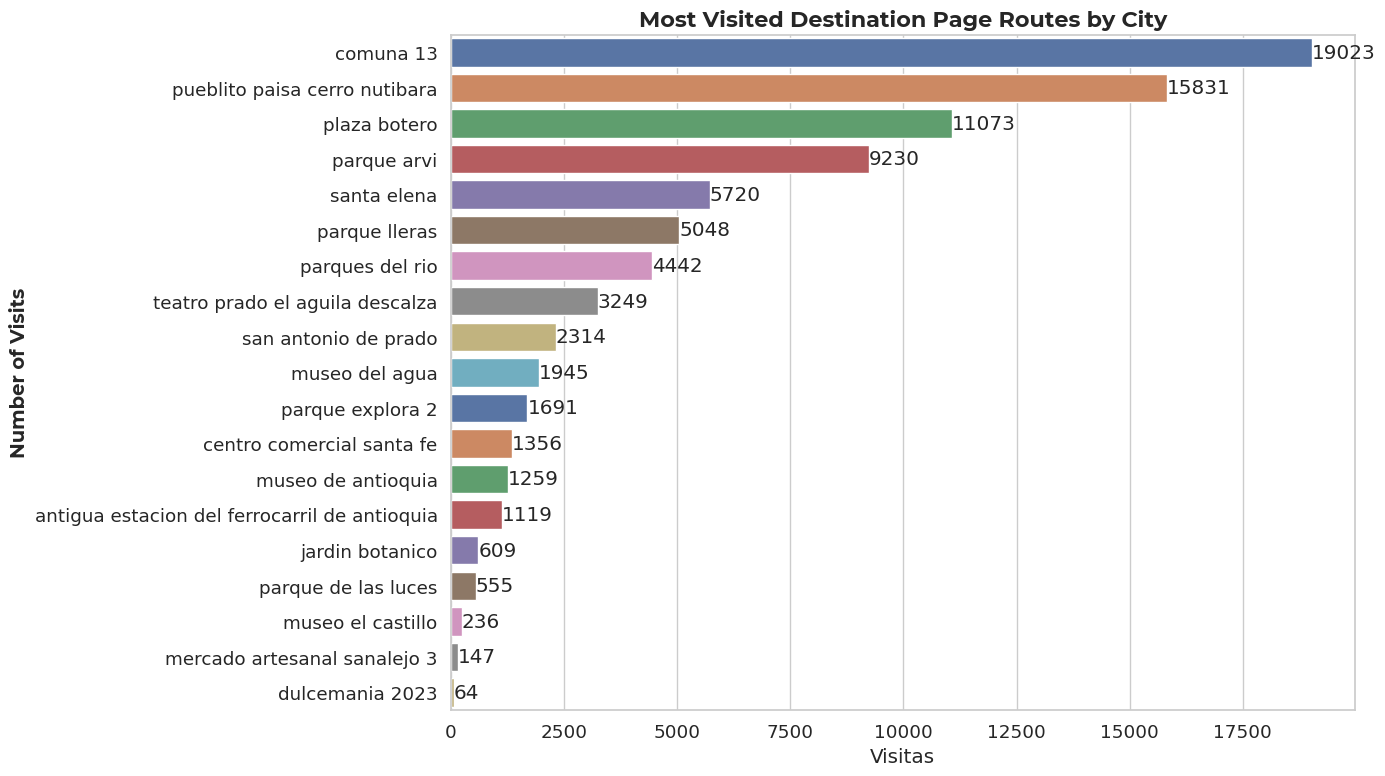

In [ ]:
# Contar el número de visitas por ruta de página de destino
visitas_por_ruta = df_limpio['med_rutapaginadestino'].value_counts().reset_index()
visitas_por_ruta.columns = ['Ruta', 'Visitas']

# Seleccionar las rutas de interés
rutas_de_interes = ['comuna 13', 'pueblito paisa cerro nutibara', 'plaza botero', 'parque arvi', 'jardin botanico',
                   'parques del rio', 'parque lleras', 'santa elena', 'museo de antioquia', 'museo el castillo',
                   'parque de las luces', 'parque de los deseos', 'casa de la musica', 'museo del agua',
                   'mercado artesanal sanalejo 3', 'teatro prado el aguila descalza', 'dulcemania 2023',
                   'antigua estacion del ferrocarril de antioquia', 'centro comercial santa fe', 'parque explora 2',
                   'san antonio de prado']

top_rutas = visitas_por_ruta[visitas_por_ruta['Ruta'].isin(rutas_de_interes)].sort_values('Visitas', ascending=False)

# Crear la gráfica
plt.figure(figsize=(14, 8))
sns.barplot(data=top_rutas, x='Visitas', y='Ruta', palette='deep', order=top_rutas['Ruta'])

# Añadir etiquetas de datos
for index, value in enumerate(top_rutas['Visitas']):
    plt.text(value, index, str(value), va='center')

# Cargar la fuente Montserrat
font_path = 'Montserrat-Bold.ttf'
fm.fontManager.addfont(font_path)

# Configurar la fuente
montserrat_bold = fm.FontProperties(fname=font_path)

plt.title('Most Visited Destination Page Routes by City', fontproperties=montserrat_bold, fontsize=16)
plt.ylabel('Number of Visits',fontproperties=montserrat_bold, fontsize=14)

plt.tight_layout()
plt.show()


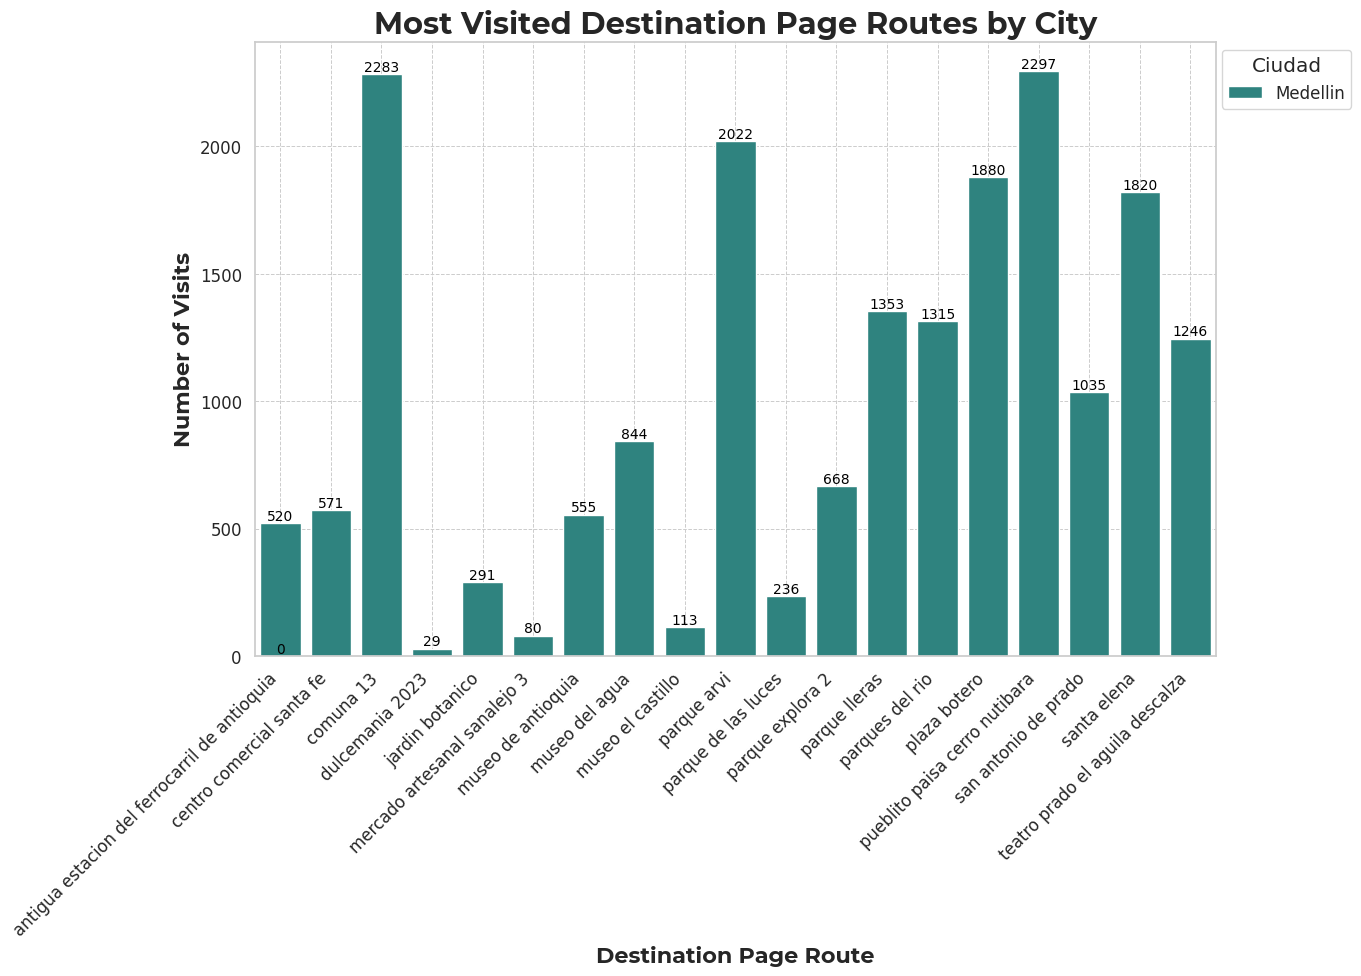

In [ ]:
# Contar el número de visitas por ruta de página de destino y ciudad
visitas_por_ruta_y_ciudad = df_limpio.groupby(['med_rutapaginadestino', 'med_ciudad']).size().reset_index(name='Visitas')

# Seleccionar las rutas de interés
rutas_de_interes = ['comuna 13', 'pueblito paisa cerro nutibara', 'plaza botero', 'parque arvi', 'jardin botanico',
                   'parques del rio', 'parque lleras', 'santa elena', 'museo de antioquia', 'museo el castillo',
                   'parque de las luces', 'parque de los deseos', 'casa de la musica', 'museo del agua',
                   'mercado artesanal sanalejo 3', 'teatro prado el aguila descalza', 'dulcemania 2023',
                   'antigua estacion del ferrocarril de antioquia', 'centro comercial santa fe', 'parque explora 2',
                   'san antonio de prado']

# Filtrar el DataFrame para incluir solo las rutas de interés
top_visitas_por_ruta_y_ciudad = visitas_por_ruta_y_ciudad[visitas_por_ruta_y_ciudad['med_rutapaginadestino'].isin(rutas_de_interes)]

# Ordenar el DataFrame por número de visitas de forma descendente
top_visitas_por_ruta_y_ciudad = top_visitas_por_ruta_y_ciudad.sort_values('Visitas', ascending=False)

# Identificar la ciudad con más visitas para cada ruta
ciudad_mas_comun = top_visitas_por_ruta_y_ciudad.loc[top_visitas_por_ruta_y_ciudad.groupby('med_rutapaginadestino')['Visitas'].idxmax()]

# Configuración del estilo de la gráfica
plt.figure(figsize=(14, 10))  # Aumentar el tamaño de la figura
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)  # Aumentar el tamaño de la fuente

# Crear la gráfica de barras
ax = sns.barplot(
    x='med_rutapaginadestino',
    y='Visitas',
    hue='med_ciudad',
    data=ciudad_mas_comun,
    palette="viridis",
    dodge=True
)

# Cargar la fuente Montserrat
font_path = 'Montserrat-Bold.ttf'
fm.fontManager.addfont(font_path)

# Configurar la fuente
montserrat_bold = fm.FontProperties(fname=font_path)

# Personalización de la gráfica
plt.title('Most Visited Destination Page Routes by City', fontproperties=montserrat_bold, fontsize=22)
plt.xlabel('Destination Page Route', fontproperties=montserrat_bold, fontsize=16)
plt.ylabel('Number of Visits',fontproperties=montserrat_bold, fontsize=16)

plt.xticks(rotation=45, fontsize=12, ha='right')  # Mejorar la rotación de etiquetas
plt.yticks(fontsize=12)
plt.legend(title='Ciudad', fontsize=12, loc='upper right', bbox_to_anchor=(1.15, 1))

# Añadir etiquetas de valor sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Ajustar márgenes y mostrar la gráfica
plt.tight_layout()
plt.grid(visible=True, linestyle='--', linewidth=0.7)  # Añadir una cuadrícula más sutil

# Mostrar la gráfica
plt.show()

